<a href="https://colab.research.google.com/github/matejsarlija/ctm/blob/main/words_meaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
from bs4 import BeautifulSoup
import string
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


table = str.maketrans('', '', string.punctuation)


stopwords = ["a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at",
             "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do",
             "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having",
             "he", "hed", "hes", "her", "here", "heres", "hers", "herself", "him", "himself", "his", "how",
             "hows", "i", "id", "ill", "im", "ive", "if", "in", "into", "is", "it", "its", "itself",
             "lets", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought",
             "our", "ours", "ourselves", "out", "over", "own", "same", "she", "shed", "shell", "shes", "should",
             "so", "some", "such", "than", "that", "thats", "the", "their", "theirs", "them", "themselves", "then",
             "there", "theres", "these", "they", "theyd", "theyll", "theyre", "theyve", "this", "those", "through",
             "to", "too", "under", "until", "up", "very", "was", "we", "wed", "well", "were", "weve", "were",
             "what", "whats", "when", "whens", "where", "wheres", "which", "while", "who", "whos", "whom", "why",
             "whys", "with", "would", "you", "youd", "youll", "youre", "youve", "your", "yours", "yourself",
             "yourselves"]

In [15]:
import pandas as pd
import numpy as np

sentences = []
labels = []
urls = []


df = pd.read_json("sarcasm.json", lines=True)
for index, row in df.iterrows():
    sentence = row['headline'].lower()
    sentence = sentence.replace(",", " , ")
    sentence = sentence.replace(".", " . ")
    sentence = sentence.replace("-", " - ")
    sentence = sentence.replace("/", " / ")

    soup = BeautifulSoup(sentence)
    sentence = soup.get_text()
    words = sentence.split()
    filtered_sentence = ""
    for word in words:
        word.translate(table)
        if word not in stopwords:
            filtered_sentence = filtered_sentence + word + " "
    sentences.append(filtered_sentence)
    labels.append(row['is_sarcastic'])
    urls.append(row['article_link'])


<ipython-input-15-53c56c65ee44>:17: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(sentence)


In [8]:
training_size = 23000

training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [17]:
vocab_size = 20000
trunc_type = 'post'
padding_type = 'post'
oov_tok = "<OOV>"


tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, padding='post')
print(word_index)

{'<OOV>': 1, 'new': 2, 'man': 3, 'trump': 4, 'not': 5, 'just': 6, 'report': 7, 'will': 8, 'one': 9, 'year': 10, 'u': 11, 'area': 12, 's': 13, 'woman': 14, 'says': 15, 'can': 16, 'day': 17, 'first': 18, 'like': 19, 'donald': 20, 'time': 21, 'no': 22, 'get': 23, 'old': 24, 'off': 25, 'people': 26, 'life': 27, 'now': 28, "'": 29, "trump's": 30, 'house': 31, 'obama': 32, 'white': 33, 'make': 34, 'back': 35, 'still': 36, 'women': 37, 'world': 38, '5': 39, 'way': 40, 'clinton': 41, 'americans': 42, 'family': 43, 'study': 44, 'years': 45, 'black': 46, 'best': 47, "can't": 48, 'school': 49, 'gop': 50, "it's": 51, 'know': 52, 'bill': 53, '3': 54, 'really': 55, 'finds': 56, 'last': 57, 'american': 58, '10': 59, 'watch': 60, 'nation': 61, 'home': 62, 'video': 63, 'police': 64, 'going': 65, 'say': 66, 'death': 67, 'good': 68, 'president': 69, 'show': 70, 'health': 71, 'state': 72, 'getting': 73, 'things': 74, 'right': 75, 'every': 76, 'mom': 77, 'campaign': 78, 'big': 79, 'gets': 80, 'party': 81, 

In [22]:
print(training_padded)

[[13970   231  3433 ...     0     0     0]
 [ 6306  1522   580 ...     0     0     0]
 [  836  9838   160 ...     0     0     0]
 ...
 [    1  3336  7105 ...     0     0     0]
 [ 1219     1     1 ...     0     0     0]
 [   14    80  2231 ...     0     0     0]]


In [21]:
print(testing_sequences)

[[12614, 19389, 1, 7027, 187], [947, 1, 3741, 5789, 1007, 996, 3600, 1524], [2, 3848, 838, 260, 1, 40, 1244, 68, 168], [1, 1453, 2846, 453, 148, 1, 1403, 145], [1447, 309, 4158, 1, 1033, 875, 465, 16, 101], [141, 38, 125, 3262, 351, 2528, 8209], [96, 1713, 9826, 9827, 28, 3684], [2196, 10220, 1034, 89, 286, 1157, 28], [1428, 1429, 1634, 187, 1681, 4801, 1692, 30, 4011], [508, 16530, 540, 19, 769, 1372, 337, 6], [2470, 3, 1144, 1917, 1], [835, 6, 820, 1, 980, 76, 135], [1, 192, 73, 3188, 7876], [7, 973, 58, 969, 39, 91, 10, 9635, 681], [51, 19, 2023, 746, 4314, 14451, 465], [323, 448, 13793, 6321, 1, 6836, 1687, 1, 3391, 1366], [2954, 70, 4949, 2338, 19, 3524, 45, 858], [2570, 25, 7792, 7468, 34, 1, 5803, 106, 1465, 2013], [778, 2496, 100, 49, 17008, 6233, 2496, 142], [1113, 803, 1, 1, 1, 1], [517, 340, 313, 754], [20, 30, 447, 356, 1073, 345, 291], [9092, 6552, 3663, 61, 250, 722, 1, 2094, 1], [121, 599, 256, 1085, 565, 8302], [44, 56, 26, 5089, 52, 1483, 360, 1202, 306, 4068, 2665], [

In [24]:
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, padding='post')

In [25]:
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [27]:
from collections import OrderedDict

wc = tokenizer.word_counts
newlist = (OrderedDict(sorted(wc.items(), key=lambda t:t[1], reverse=True)))

print(newlist)

OrderedDict([('new', 1336), ('man', 1131), ('trump', 1096), ('not', 616), ('just', 521), ('report', 489), ('will', 483), ('one', 453), ('year', 441), ('u', 413), ('area', 400), ('s', 398), ('woman', 395), ('says', 392), ('can', 388), ('day', 386), ('first', 376), ('like', 375), ('donald', 370), ('time', 364), ('no', 347), ('get', 338), ('old', 334), ('off', 327), ('people', 323), ('life', 322), ('now', 315), ("'", 313), ("trump's", 311), ('house', 302), ('obama', 297), ('white', 295), ('make', 286), ('back', 285), ('still', 283), ('women', 267), ('world', 251), ('5', 250), ('way', 250), ('clinton', 244), ('americans', 233), ('family', 224), ('study', 216), ('years', 213), ('black', 211), ('best', 207), ("can't", 207), ('school', 205), ('gop', 205), ("it's", 205), ('know', 203), ('bill', 202), ('3', 202), ('really', 202), ('finds', 199), ('last', 198), ('american', 196), ('10', 194), ('watch', 194), ('nation', 192), ('home', 192), ('video', 190), ('police', 190), ('going', 190), ('say',

<function matplotlib.pyplot.show(close=None, block=None)>

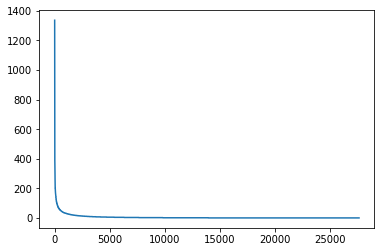

In [31]:
import matplotlib.pyplot as plt

xs = []
ys = []

curr_x = 1
for item in newlist:
    xs.append(curr_x)
    curr_x = curr_x +1
    ys.append(newlist[item])

plt.plot(xs,ys)
plt.show
# ugl. buduci da je ovo OrderedDict kojeg smo sortirali, samo pokazujemo nejednakost između prvih riječi, koje nesretno koristimo i za training

In [37]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(2000, 7),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dropout(.25),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',
              optimizer='adam', metrics=['accuracy'])